## Reading Data and making basic data manipulation

In [1]:
%%time
import pandas as pd
import numpy as np

########## Initing Constants and Variables ##########
TEXT_COL = 'Phrase'
AUX_CLASS_COL = 'new_sent'
class_col = 'Sentiment'


########## Reading Data ##########
df = pd.read_csv('sentiment-analysis-on-movie-reviews/train.tsv',sep='\t')

# Removing 'neutral' Analysis to improve separability in Negative and Positive Class
df = df[df[class_col] != 2]
df = df[df[class_col] != 1]
df = df[df[class_col] != 3]

# Grouping by SentenceId and transforming data as a list
df2 = df.groupby('SentenceId').agg(lambda x: x.tolist())
# Getting review sentiment mean 
df2['sent_mean'] = df2[class_col].apply(lambda x: np.array(x).mean())

# Transform sentiment values to only positive and negative values
# Setting all instaces as negative (0)
df2[AUX_CLASS_COL] = 0 
# Setting only most than 2 class as 1 (positive)
df2.loc[df2['sent_mean'] > 2,AUX_CLASS_COL] = 1

# Join text from the text list created in groupby agg
df2[TEXT_COL] = df2[TEXT_COL].apply(lambda x: ' '.join(x))

# Reset index
df2.reset_index(drop=True, inplace=True)

# Redefining df DataFrame
df = df2.copy()
# Changing class_col name
class_col = AUX_CLASS_COL

CPU times: user 654 ms, sys: 367 ms, total: 1.02 s
Wall time: 589 ms


## Basic Text dataprep

In [2]:
%%time
from data_prep import basic_preprocess_text

# Removing stopwords
df[TEXT_COL] = basic_preprocess_text(df[TEXT_COL], language='english')
# Removing Duplicates
df = df.drop_duplicates(subset=[TEXT_COL])
df.reset_index(drop=True,inplace=True)

CPU times: user 662 ms, sys: 360 ms, total: 1.02 s
Wall time: 579 ms


/home/gerson/Develop/Projects/find_best_words_with_chi2/data_prep.py:26: FutureWarning: The default value of regex will change from True to False in a future version.
  text_series = text_series.str.replace(pat,'')
/home/gerson/Develop/Projects/find_best_words_with_chi2/data_prep.py:28: FutureWarning: The default value of regex will change from True to False in a future version.
  text_series = text_series.str.replace(r'\s+',' ')
/home/gerson/Develop/Projects/find_best_words_with_chi2/data_prep.py:31: FutureWarning: The default value of regex will change from True to False in a future version.
  text_series = text_series.str.replace('[^\w\s]','')
/home/gerson/Develop/Projects/find_best_words_with_chi2/data_prep.py:33: FutureWarning: The default value of regex will change from True to False in a future version.
  text_series = text_series.str.replace(' \d+','')


## Plotting basic word cloud 

Doing 0 graph
Doing 1 graph


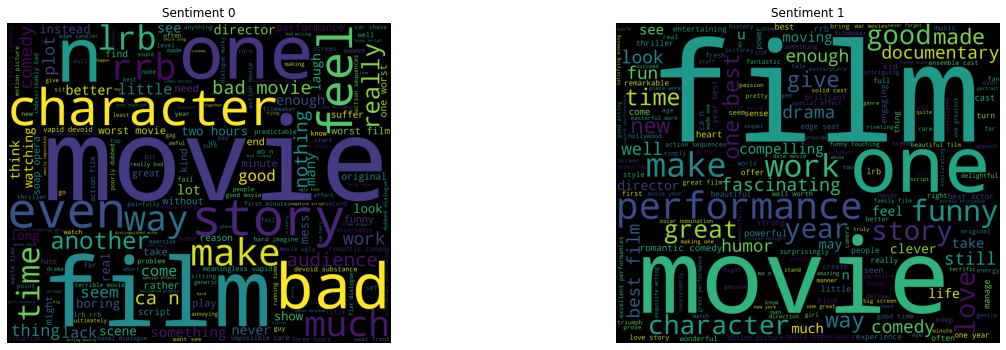

CPU times: user 23.7 s, sys: 787 ms, total: 24.5 s
Wall time: 24.5 s


In [4]:
%%time
from plot_word_cloud import plot_word_cloud
plot_word_cloud(df, TEXT_COL, CLASS_COL)

## Getting best features using chi2 and tfidf
## Plotting best features and new word cloud

0


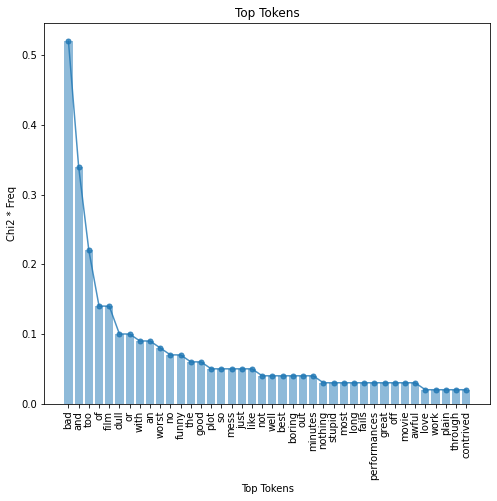

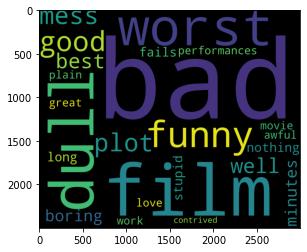

1


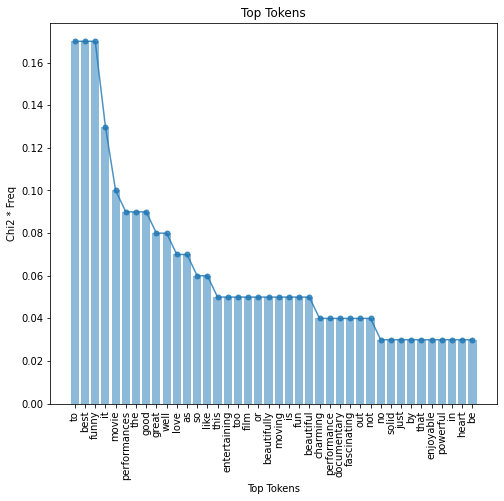

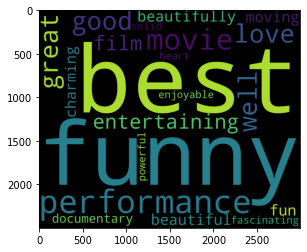

CPU times: user 11.2 s, sys: 452 ms, total: 11.7 s
Wall time: 11.9 s


In [5]:
%%time
from best_words_utils import get_main_words_pipeline, plot_results

classes = [0,1]
for c in classes:
    print(c)
    result_chi2_freq = get_main_words_pipeline(df2, TEXT_COL, CLASS_COL, c, ngram=(1,1), max_words=40)
    plot_results(result_chi2_freq)